In [25]:
import os 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii as at

if os.path.exists('paper.mplstyle'):
    plt.style.use('paper.mplstyle')
PAPER_DIR = os.path.expanduser("~/my_papers/TESS_young/")

In [3]:
rng = np.random.default_rng(42)

In [4]:
randn = rng.normal(size=1000)

In [5]:
# weights = np.ones_like(randn)
weights = rng.random(size=1000)
print(min(weights),max(weights))

0.0005187441657055203 0.9994219092241878


(array([  3.,  14.,  27.,  55., 109., 112., 177., 190., 140.,  73.,  55.,
         34.,   6.,   3.]),
 array([-3.        , -2.57142857, -2.14285714, -1.71428571, -1.28571429,
        -0.85714286, -0.42857143,  0.        ,  0.42857143,  0.85714286,
         1.28571429,  1.71428571,  2.14285714,  2.57142857,  3.        ]),
 <BarContainer object of 14 artists>)

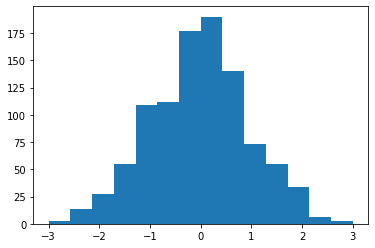

In [6]:
plt.hist(randn,bins=np.linspace(-3,3,15))

In [7]:
# hist, bin_edges = np.histogram(randn,weights=weights,density=True,bins=np.linspace(-3,3,15))

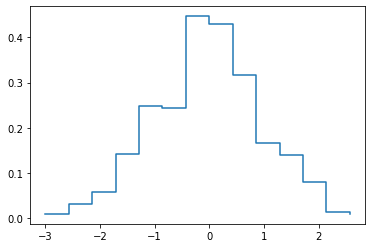

In [8]:
hist, bin_edges = np.histogram(randn,weights=weights,density=True,bins=np.linspace(-3,3,15))
plt.step(bin_edges[:-1],hist,where="post")

In [9]:
# Now remove some values and redistribute their probability
bad = randn<-2

remake = np.copy(randn)
reweight = np.copy(weights)

nbad = len(np.where(bad)[0])
ntot = len(randn)
ngood = ntot - nbad

move_prob = np.sum(weights[bad])/ngood
reweight[bad] = 0
reweight[~bad] += move_prob

In [10]:
hist2, bin_edges2 = np.histogram(remake,weights=reweight,density=True,bins=np.linspace(-3,3,15))

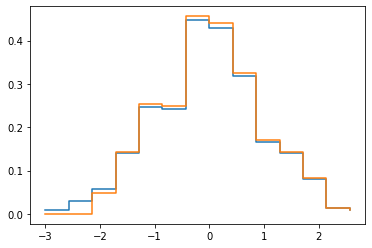

In [11]:
plt.step(bin_edges[:-1],hist,where="post")
plt.step(bin_edges2[:-1],hist2,where="post")

(30, 14)
(30, 14)
(29, 13)


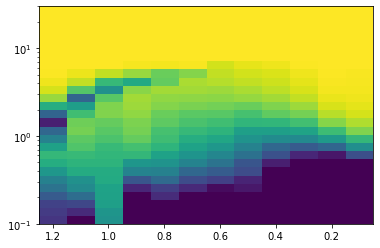

In [12]:
# This version does not plot the correct output histogram, because it's showing us probability density
model = "WideHat8Myr_Mattea2022"
model_age = 80
mass_bins = np.arange(0.05,1.4,0.1)
nbins = 30
# period_bins = np.linspace(0,40,nbins)
period_bins = np.logspace(np.log10(0.08),np.log10(40),nbins)

kde_pfile = os.path.expanduser("~/Dropbox/Models/UpSco_KDE_init/all_KDE_corrected.csv")
kde_prob = at.read(kde_pfile)

mod_file = os.path.expanduser(f"~/Dropbox/Models/{model}/{model}_{model_age:05d}Myr.txt")
#     print(mod_file)
mod = at.read(mod_file,names=["mass","prot"])
mod["Prob"] = kde_prob["Prob"]
prot_prob = mod["Prob"]

img_raw, xedges, yedges = np.histogram2d(mod["mass"],mod["prot"],
                                           weights=mod["Prob"],density=True,
                                           bins=[mass_bins,period_bins])

X, Y = np.meshgrid(xedges, yedges)
print(np.shape(X))
print(np.shape(Y))
img = img_raw.T
print(np.shape(img))
plt.pcolormesh(X, Y, img,cmap="viridis_r",vmin=1e-4,vmax=0.5)
plt.xlim(1.25,0.05)
# plt.ylim(0,14)
plt.ylim(0.1,30)
plt.yscale("log")

(30, 14) (14,)
(30, 14) (30,)
(29, 13)
(29, 13) (13,)
(29, 13) (29,)
(29, 13)


(1.25, 0.05)

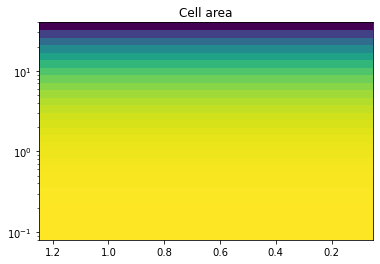

In [13]:
# Figuring out how to get the area of each cell into the right array format
X, Y = np.meshgrid(xedges, yedges)
print(np.shape(X),np.shape(xedges))
print(np.shape(Y),np.shape(yedges))
img = img_raw.T
print(np.shape(img))

xdiff = np.diff(xedges) # mass
ydiff = np.diff(yedges) #period

Xdiff, Ydiff = np.meshgrid(xdiff,ydiff)
# print(Xdiff)
# print(Ydiff)
print(np.shape(Xdiff),np.shape(xdiff))
print(np.shape(Ydiff),np.shape(ydiff))
cell_area = Xdiff*Ydiff
print(np.shape(cell_area))

plt.pcolormesh(X, Y, cell_area,cmap="viridis_r")#,vmin=1e-4,vmax=0.5)
plt.title("Cell area")
plt.yscale("log")
plt.xlim(1.25,0.05)

Text(0, 0.5, 'period')

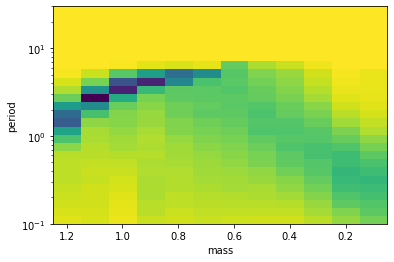

In [14]:
# Now plot the number density of stars

# Read in the model
model = "WideHat8Myr_Mattea2022"
model_age = 80
mass_bins = np.arange(0.05,1.4,0.1)
nbins = 30
# period_bins = np.linspace(0,40,nbins)
period_bins = np.logspace(np.log10(0.08),np.log10(40),nbins)

kde_pfile = os.path.expanduser("~/Dropbox/Models/UpSco_KDE_init/all_KDE_corrected.csv")
kde_prob = at.read(kde_pfile)

mod_file = os.path.expanduser(f"~/Dropbox/Models/{model}/{model}_{model_age:05d}Myr.txt")
#     print(mod_file)
mod = at.read(mod_file,names=["mass","prot"])
mod["Prob"] = kde_prob["Prob"]
prot_prob = mod["Prob"]

# Create the histogram of probability density
img_raw, xedges, yedges = np.histogram2d(mod["mass"],mod["prot"],
                                           weights=mod["Prob"],density=True,
                                           bins=[mass_bins,period_bins])
X, Y = np.meshgrid(xedges, yedges)

# Determine the cell area
xdiff = np.diff(xedges) # mass
ydiff = np.diff(yedges) #period

Xdiff, Ydiff = np.meshgrid(xdiff,ydiff)
cell_area = Xdiff*Ydiff

# Now calculate the number density in each cell, for better visualization
img = img_raw.T * cell_area

plt.pcolormesh(X, Y, img,cmap="viridis_r")#,vmin=1e-4,vmax=0.5)
plt.xlim(1.25,0.05)
# plt.ylim(0,14)
plt.ylim(0.1,30)
plt.yscale("log")
plt.xlabel("mass")
plt.ylabel("period")

# Compare KDE distribution to Upper Sco data

In [15]:
dat = at.read("AngieUpperScoMasses.txt")
dat.dtype

dtype([('EPIC', '<i8'), ('Vmag', '<f8'), ('Kmag', '<f8'), ('V_KSo', '<f8'), ('V_KSu', '<f8'), ('E_V_Ks', '<f8'), ('Kmag_0', '<f8'), ('V_Ks_0', '<f8'), ('P1', '<f8'), ('disk', '<U5'), ('AngieMass', '<f8')])

In [16]:
print(min(dat["AngieMass"]),max(dat["AngieMass"]))
print(min(dat["P1"]),max(dat["P1"]))

0.110895991 1.37425601
0.1025 38.3933


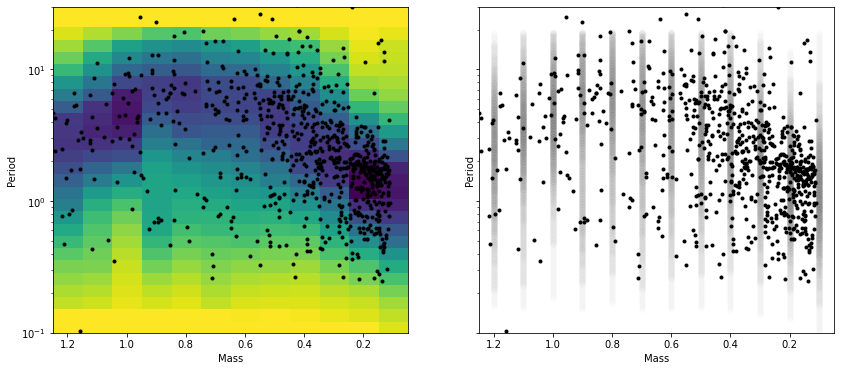

In [17]:
model = "WideHat8Myr_Mattea2022"
model_age = 8
mass_bins = np.arange(0.05,1.4,0.1)
nbins = 30
# period_bins = np.linspace(0,40,nbins)
# period_scale="linear"
period_bins = np.logspace(np.log10(0.08),np.log10(40),nbins)
period_scale="log"

kde_pfile = os.path.expanduser("~/Dropbox/Models/UpSco_KDE_init/all_KDE_corrected.csv")
kde_prob = at.read(kde_pfile)

mod_file = os.path.expanduser(f"~/Dropbox/Models/{model}/{model}_{model_age:05d}Myr.txt")
#     print(mod_file)
mod = at.read(mod_file,names=["mass","prot"])
mod["Prob"] = kde_prob["Prob"]
prot_prob = mod["Prob"]




img_raw, xedges, yedges = np.histogram2d(mod["mass"],mod["prot"],
                                           weights=mod["Prob"],density=True,
                                           bins=[mass_bins,period_bins])


X, Y = np.meshgrid(xedges, yedges)

# Determine the cell area
xdiff = np.diff(xedges) # mass
ydiff = np.diff(yedges) #period

Xdiff, Ydiff = np.meshgrid(xdiff,ydiff)
cell_area = Xdiff*Ydiff

# Now calculate the number density in each cell, for better visualization
img = img_raw.T * cell_area

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(14,6),sharex=True,sharey=True)
axes[0].pcolormesh(X, Y, img,cmap="viridis_r")#,vmin=1e-2,vmax=1.25)
plt.xlim(1.25,0.05)
if period_scale=="linear":
    plt.ylim(0,14)
else:
    plt.ylim(0.1,30)
    plt.yscale(period_scale)

axes[0].plot(dat["AngieMass"],dat["P1"],'k.')

axes[0].set_xlabel("Mass")
axes[0].set_ylabel("Period")
axes[1].set_xlabel("Mass")
axes[1].set_ylabel("Period")

for i in range(len(mod)):
    axes[1].scatter(mod["mass"][i],mod["prot"][i],color="k",alpha=mod["Prob"][i]*10)
axes[1].plot(dat["AngieMass"],dat["P1"],'k.')

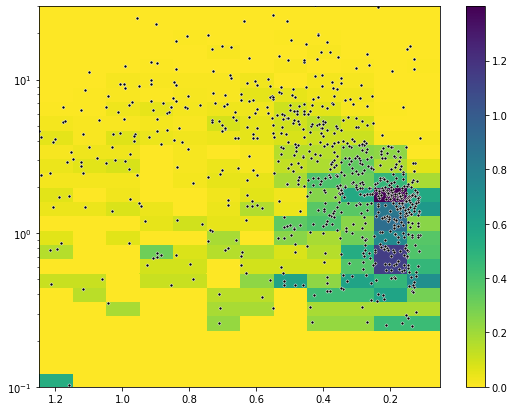

In [18]:

img_rawcl, xedgescl, yedgescl = np.histogram2d(dat["AngieMass"],dat["P1"],
                                         density=True,
                                         bins=[mass_bins,period_bins])
Xcl, Ycl = np.meshgrid(xedgescl, yedgescl)
imgcl = img_rawcl.T

plt.figure(figsize=(9,7))
plt.pcolormesh(Xcl, Ycl, imgcl,cmap="viridis_r")#,vmin=1e-2,vmax=1.25)
plt.colorbar()
plt.plot(dat["AngieMass"],dat["P1"],'k.',mec="w",mew=0.5)



plt.xlim(1.25,0.05)
# plt.ylim(0,14)
plt.ylim(0.1,30)
plt.yscale("log")

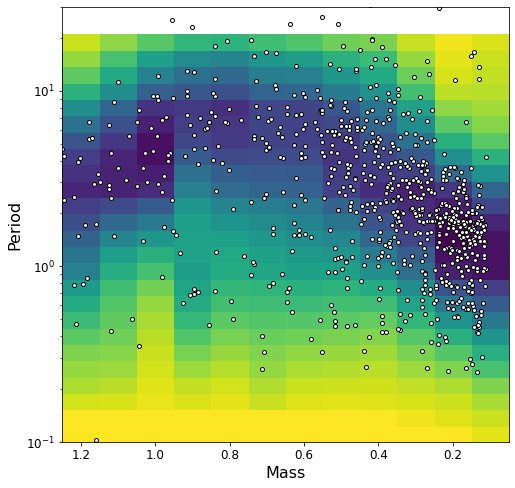

In [27]:
# Plot the upper sco stars on the KDE itself


mass_bins = np.arange(0.05,1.4,0.1)
nbins = 30
# period_bins = np.linspace(0,40,nbins)
# period_scale="linear"
period_bins = np.logspace(np.log10(0.08),np.log10(40),nbins)
period_scale="log"

kde_pfile = os.path.expanduser("~/Dropbox/Models/UpSco_KDE_init/all_KDE_corrected.csv")
kde_prob = at.read(kde_pfile)

mod = kde_prob


img_raw, xedges, yedges = np.histogram2d(mod["Mass"],mod["prot"],
                                           weights=mod["Prob"],density=True,
                                           bins=[mass_bins,period_bins])


X, Y = np.meshgrid(xedges, yedges)

# Determine the cell area
xdiff = np.diff(xedges) # mass
ydiff = np.diff(yedges) #period

Xdiff, Ydiff = np.meshgrid(xdiff,ydiff)
cell_area = Xdiff*Ydiff

# Now calculate the number density in each cell, for better visualization
img = img_raw.T * cell_area

# Mask out any regions where the KDE does not exist

img_nomask = np.copy(img)

# mask the image so it doesn't show cells outside the kde
mass_array = mod["Mass"]
prot_array = mod["prot"]
model_exists = np.ones(np.shape(img_nomask),bool)
mask = np.zeros(np.shape(img_nomask),bool)
for i in range(len(mass_bins)-1):
    mass_loc = ((mass_array>=mass_bins[i]) &
                (mass_array<mass_bins[i+1]))
    # Calculate whether there are periods in each individual bins
    for j in range(len(period_bins)-1):
        per_loc = ((prot_array>=period_bins[j]) &
                   (prot_array<period_bins[j+1]))
        in_this_bin = np.where(mass_loc & per_loc)[0]
#             print(mass_bins[i],period_bins[j],in_this_bin)
        if len(in_this_bin)==0:
            model_exists[j,i] = False
    # Now, for this mass range, define the mask to only exclude bins
    # beyond the range of the model
#         print(model_exists[:,i])
    mod_min_j = min(np.where(model_exists[:,i]==True)[0])
    mod_max_j = max(np.where(model_exists[:,i]==True)[0])
    mask[:mod_min_j,i] = True
    mask[mod_max_j+1:,i] = True

img = np.ma.masked_array(img_nomask,mask=mask)


fig, ax = plt.subplots(1,1)
ax.pcolormesh(X, Y, img,cmap="viridis_r")#,vmin=1e-2,vmax=1.25)
plt.xlim(1.25,0.05)
if period_scale=="linear":
    plt.ylim(0,14)
else:
    plt.ylim(0.1,30)
    plt.yscale(period_scale)

ax.plot(dat["AngieMass"],dat["P1"],'w.',mec="k")
ax.set_xlabel("Mass")
ax.set_ylabel("Period")

if os.path.exists(PAPER_DIR):
    plt.savefig(os.path.join(PAPER_DIR,"fig_upsco_kde.pdf"),
                bbox_inches="tight")